<a href="https://colab.research.google.com/github/YMeghana14/-Handwritten_digit_Noise_Reduction_Using_Auto_Encoder/blob/main/Handwritten_digit_Noise_Reduction_Using_Auto_Encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import GaussianNoise

from tensorflow.keras.datasets import mnist

In [ ]:
#importing the data
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


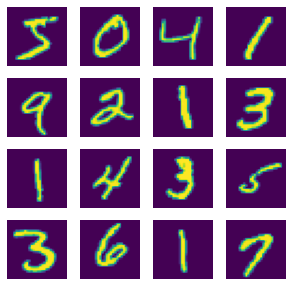

In [ ]:
#plotting the images
plt.figure(figsize=(5,5))

for i in range(16):
  plt.subplot(4,4,i+1)
  plt.axis("off")
  plt.imshow(X_train[i])
plt.show()

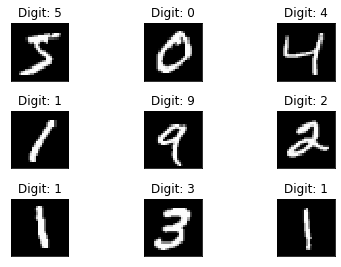

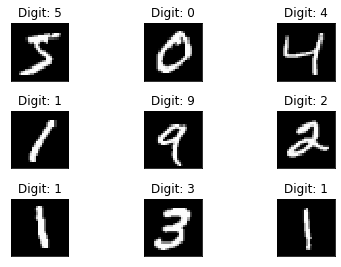

In [ ]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

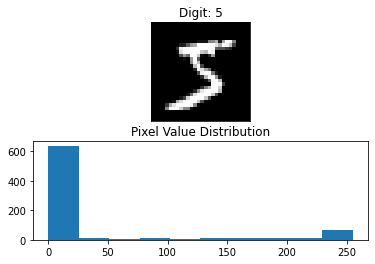

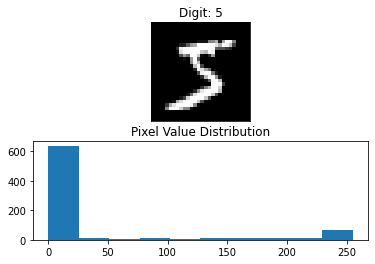

In [ ]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.imshow(X_train[0], cmap='gray', interpolation='none')
plt.title("Digit: {}".format(y_train[0]))
plt.xticks([])
plt.yticks([])
plt.subplot(2,1,2)
plt.hist(X_train[0].reshape(784))
plt.title("Pixel Value Distribution")
fig

In [ ]:
#normalising the data
X_train = X_train/255.0

X_test = X_test/255.0

In [ ]:
#introducing the noise in the data
noise = GaussianNoise(0.4)

noisy_image = noise(X_train[:16], training =True)

Actual Image


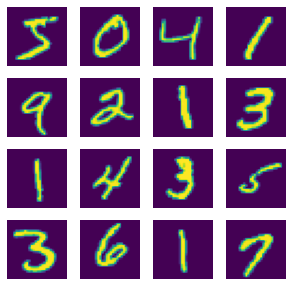

Noisy Image


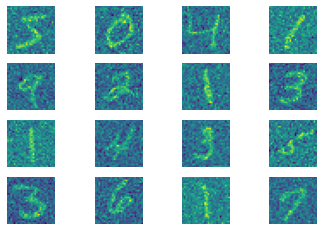

In [ ]:
#plotting actual image and noisy image
plt.figure(figsize=(5,5))

print("Actual Image")
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.axis("off")
  plt.imshow(X_train[i])
plt.show()

print("Noisy Image")
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.axis("off")
  plt.imshow(noisy_image[i])
plt.show()

In [ ]:
#defining units and setting seeds
units = 28*28

tf.random.set_seed(101)

In [ ]:
#building encoder
encoder = Sequential()

encoder.add(Flatten(input_shape = [28,28]))
encoder.add(GaussianNoise(0.4))
encoder.add(Dense(units = units//2, activation="relu"))
encoder.add(Dense(units = units//4, activation="relu"))
encoder.add(Dense(units = units//8, activation="relu"))
encoder.add(Dense(units = units//16, activation="relu"))
encoder.add(Dense(units = units//32, activation="relu"))
encoder.add(Dense(units = units//64, activation="relu"))

In [ ]:
#building decoder
decoder = Sequential()
decoder.add(Dense(units = units//32, input_shape = [units//64], activation="relu"))
decoder.add(Dense(units = units//16, activation="relu"))
decoder.add(Dense(units = units//8, activation="relu"))
decoder.add(Dense(units = units//4, activation="relu"))
decoder.add(Dense(units = units//2, activation="relu"))
decoder.add(Dense(units = units, activation="sigmoid"))
decoder.add(Reshape([28,28]))

In [ ]:
#combining encoder and decoder
noise_red = Sequential([encoder,decoder])

In [ ]:
#compiling the model
noise_red.compile(loss = "binary_crossentropy", optimizer="adam", metrics = ["accuracy"])

In [ ]:
#training the model
noise_red.fit(X_train,X_train, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 8s 3ms/step - loss: 0.2441 - accuracy: 0.1030
Epoch 2/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1638 - accuracy: 0.1962
Epoch 3/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1528 - accuracy: 0.2132
Epoch 4/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1445 - accuracy: 0.2202
Epoch 5/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1401 - accuracy: 0.2295
Epoch 6/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1374 - accuracy: 0.2331
Epoch 7/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1355 - accuracy: 0.2359
Epoch 8/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1346 - accuracy: 0.2369
Epoch 9/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1335 - accuracy: 0.2391
Epoch 10/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.132

In [ ]:
#creating noisy image
test_noise = noise(X_test[:10], training = True)

In [ ]:
#cleaning the data using model
clean_test_image = noise_red(test_noise)

Original


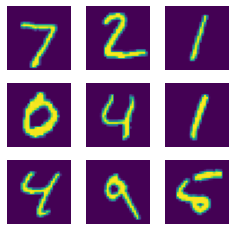

Noisy


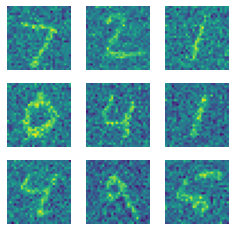

Auto-Encoder Image


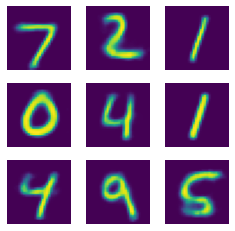

In [ ]:
#printing Actual, Noisy and Image cleaned by the model
print("Original")
plt.figure(figsize=(4, 4))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.axis("off")
    plt.imshow(X_test[i])
plt.show()

print("Noisy")
plt.figure(figsize=(4, 4))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.axis("off")
    plt.imshow(test_noise[i])
plt.show()

print("Auto-Encoder Image")
plt.figure(figsize=(4, 4))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.axis("off")
    plt.imshow(clean_test_image[i])
plt.show()